##Я - тетрадка, которая всё запускает

Dependencies:
* Python 2, Ipython notebook
* Docker, nshou/elasticsearch-kibana
* numpy, ROOT, root_numpy, zmq


How to launch a ES+kibana container:
* sudo docker run -d -p 9200:9200 -p 5601:5601 nshou/elasticsearch-kibana

Howto use kibana directly (non embedded):
* kibana висит на localhost:5601
* После первого запуска кибана попросит Configure an index pattern
 * убрать галочку index contains time-based events
 * поставить дефолтный паттерн * (или просто по вкусу), 
 * нажать "Create"
* Как построить простую гистограмму
 * наверху тык Visualize -> Vertical Bar Chart -> from new search
 * в buckets тык X Axis; 
 * Aggregation <- Histogram
 * Field <- интересующее поле (например, muonHits)
 * Interval <- 1 (или сколько хочется отдать по X на 1 бин гистограммы)
 * тык зелёную кнопку Play (треугольник) выше
* а вообще https://www.elastic.co/guide/en/kibana/current/getting-started.html
  


###запуск сервера zmq
* просто кладёт входные пакеты в очередь и отдаёт их по мере просьб "get"
* периодически меняет run number
* клиент-обёртка zmq_client.py
* zmq.REP

In [1]:
import os
os.system('python indexer/zmq_event_bus.py &')

0

###Запуск клиента-складывателя всего в ES
* процесс-индексатор, который читает события пакетами из zmq_event_bus и пишет в ElasticSearch
* Имя индекса - "run"+run_number
* Недостающие индексы создаются

In [5]:
import indexer.indexer as indexer

In [6]:
inder = indexer.Indexer(verbose=True)
#начинаем складывать ивенты в индексы. 
inder.start_indexing()

run id recieved: 15000
processing events...
84 events indexed in current run_id
processing events...
1314 events indexed in current run_id
processing events...
2389 events indexed in current run_id
processing events...
3647 events indexed in current run_id
processing events...
4730 events indexed in current run_id
processing events...
6230 events indexed in current run_id
processing events...
7105 events indexed in current run_id
processing events...
7728 events indexed in current run_id
processing events...


KeyboardInterrupt: 

###Алсо
* каждое событие пишется в индекс внутри ElasticSearch
* id события - порядковый номер его получения внутри run_id (todo: мб eventNumber?)
* маппинг события:

In [9]:
import indexer.event as event
len(event.es_event_mapping['properties'])

10003

#quickpace visualization

In [10]:
import elasticsearch
import presenter.visualize as visualize
%matplotlib inline
es = elasticsearch.Elasticsearch(["localhost:9200"])

CPU times: user 156 ms, sys: 4 ms, total: 160 ms
Wall time: 204 ms


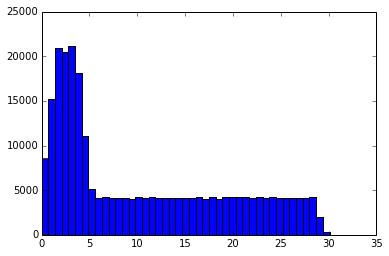

In [11]:
%%time
visualize.plot_1d_hist("avgMass",0,70,100,es,"run*")

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 276 ms


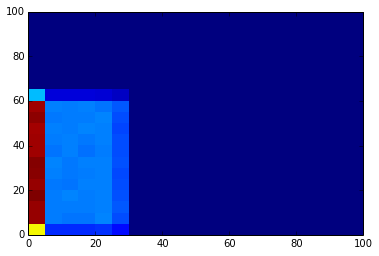

In [12]:
%%time
xmin,xmax = 0,100
xbins = 20
xname = "avgMass"
ymin,ymax = 0,100
ybins = 20
yname = "muonHits"
visualize.plot_2d_hist(xname,xmin,xmax,xbins,yname,ymin,ymax,ybins,es,index="run*")
